# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

## Download the repository

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images than can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

In [4]:
!git clone https://github.com/Etinuz/Painters.git

Cloning into 'Painters'...
remote: Enumerating objects: 104, done.
remote: Total 104 (delta 0), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (104/104), 21.89 MiB | 32.97 MiB/s, done.
Resolving deltas: 100% (3/3), done.


Good! Let's take a look at some of our pictures then.

In [0]:
classes = ['rembrandt','vermeer','vincent', 'leonardo']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

rembrandt


vermeer


vincent


leonardo


## View data

In [0]:
path = '../content/Painters/images'


In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4, bs=16)

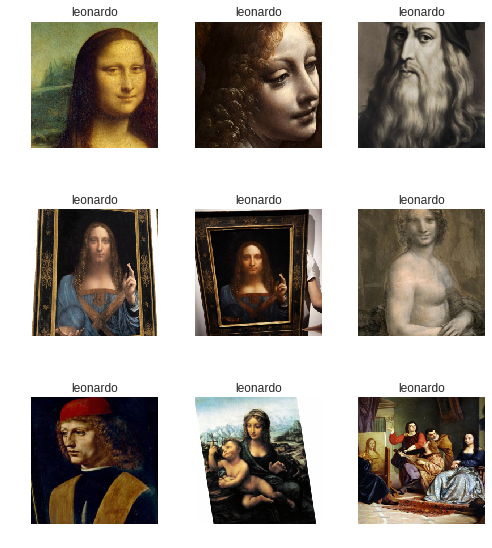

In [29]:
data.show_batch(rows=3, figsize=(7,8))

In [30]:
data.classes, data.c

(['leonardo'], 1)

## Train model

In [32]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:05<00:00, 15917281.86it/s]


It's your turn :-)  

Try to improve the accuracy of the model. You can think o|:
- changing the model
- more epochs
- different learning rate
- 

In [31]:
learn.fit_one_cycle(1)

NameError: ignored

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find(stop_div=False)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


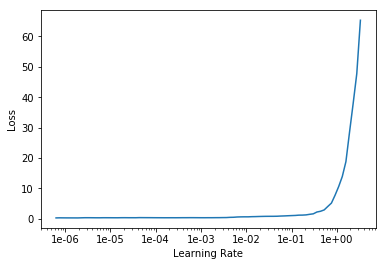

In [0]:
learn.recorder.plot()

In [0]:
learn.save('stage-1')

<bound method Learner.get_preds of ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f5282f53d68>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddi

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 00:20
epoch  train_loss  valid_loss  error_rate
1      0.321531    0.403537    0.133929    (00:10)
2      0.320935    0.425655    0.142857    (00:10)



In [0]:
learn.save('stage-2')

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

Total time: 00:42
epoch  train_loss  valid_loss  error_rate
1      0.223783    0.337876    0.099174    (00:10)
2      0.234958    0.353967    0.123967    (00:10)
3      0.188709    0.353351    0.115702    (00:09)
4      0.161516    0.359143    0.115702    (00:11)



## Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

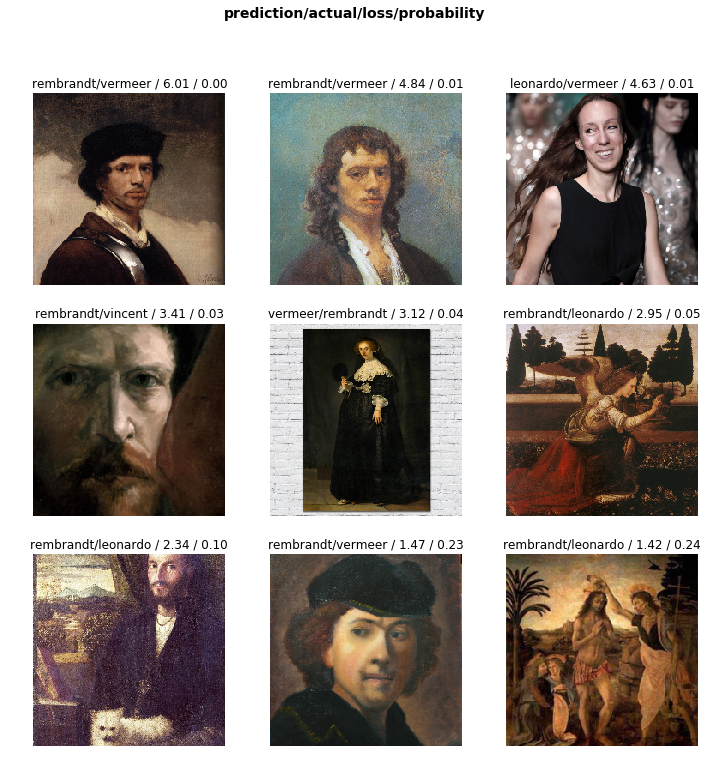

In [0]:
interp.plot_top_losses(9)

In [0]:
data.c

4

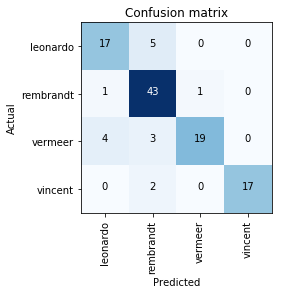

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused(min_val=1)

[('leonardo', 'rembrandt', 5),
 ('rembrandt', 'vermeer', 4),
 ('vermeer', 'rembrandt', 2)]

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [0]:
fd = FileDeleter(file_paths=top_loss_paths)

Button(button_style='primary', description='Confirm', style=ButtonStyle())

## Optional: Prune images